Neural networks and how they can be trained on the cancer dataset in scikit-learn for the purposes of predicting if a tumor sample is malignant or benign. A few introductory notions of neural nets and multi-layer perceptrons (MLP).

MLPs are the most basic models of feed forward NN. This means that the flow of information goes in only one direction unlike other methods such as back-bone propagation and other methods.

MLPs can be viewed as **generalizations of linear models** ( multiple stages of processing to reach the final decision). Just like other linear models, the final prediction depends on the weighting of the input features.

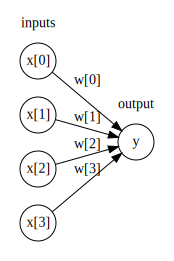

In [3]:
# Something like this.
import mglearn
mglearn.plots.plot_logistic_regression_graph()

for MLPs, weights , w[i], are calculated multiple times

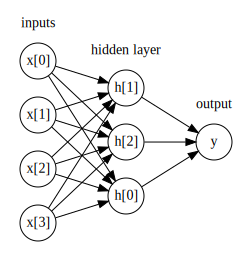

In [5]:
# A view of a single hidden multi-receptor layer (A simple NN)
mglearn.plots.plot_single_hidden_layer_graph()


A NN with multiple hidden layers are called Deep NN and looks like this:


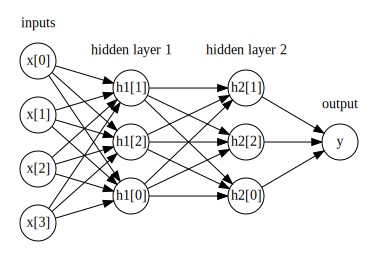

In [7]:
mglearn.plots.plot_two_hidden_layer_graph()

The difference between NN and linear models is that once the weight is computed, a none linear function is applied to the results on purpose.

**The two most commonly applied functions are:**
- RELU (Rectified linear unit).
- TANH (Tangent hyperbolic).

The results are used to calculated the output.

These non-linear functions allows NNs to be capable of doing **more complicated** computations compared to linear models.


In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer= load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

print (mlp.score(X_train,y_train))
print (mlp.score(X_test,y_test))

0.906103286385
0.881118881119


The results have a lower accuracy than the other models. This  could be an issue of the scaling of the data as the features of each sample are not of the same scale.

The maximum value of each feature is extracted to check for this issue.


In [19]:
# Maximum value of each feature
print (cancer.data.max(axis=0))

[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


The values are in different ranges. To improve results, this needs to be fixed. The idea behind fixing this is that features must have a mean of 0 and a variance of 1. This can be done automatically using scikit-learn (below).


In [20]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train_scaled=scaler.fit(X_train).transform(X_train)
X_test_scaled=scaler.fit(X_test).transform(X_test)

mlp=MLPClassifier(max_iter=1000,random_state=42) #the defualt max_iter=200 might not be enough for the optimization to reach convergance.
mlp.fit(X_train_scaled,y_train)

print (mlp.score(X_train_scaled,y_train))
print (mlp.score(X_test_scaled,y_test))

0.995305164319
0.958041958042


Better Performance than the previous model.

In [21]:
# The same as the above model but with the default value applied to max_inter
mlp=MLPClassifier(random_state=42)
mlp.fit(X_train_scaled,y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

An error appears stating that convergence was not reached.
